# First equation: 

Let $f$ be the only solution to the following differential equation:
### $$\forall (x,y) \in \mathbb{D}, \partial^2_x f(x,y) + \partial^2_y f(x,y) = 0 $$
with the following Dirichlet border conditions:
### $$\forall (x,y) \in \partial \mathbb{D}, f(x,y) =  \phi(x,y)$$ 
where:
* $\mathbb{D} = [0;1]^2$ is the square of side length $1$.
* $\partial \mathbb{D} = \{ 0;1\} \times [0;1] \cup  [0;1]\times \{0;1\}$ is the border of $\mathbb{D}$.
* $\phi$ is a function $\partial \mathbb{D} \to \mathbb{R}$.


Let $L \in \mathbb{N}^*$: we want to build $u : \{0, ..., L-1\} \times \{0, ..., L-1\} \to \mathbb{R}$ such that for every $0 \leq i < L$ and $0 \leq j < L$, $u(i,j)$ approaches $f(\frac {i} {L}, \frac {j} {L})$.

Consider a symmetric random walk $(X_n)_{n \in \mathbb{N}}$ on the lattice $\mathbb{Z}^2$. For every $n \in \mathbb{N}$, for every neighbour $(k,l)$ of $X_n$, we have:
$$\mathbb{P}[X_{n+1} = (k,l)] = \frac 1 4$$

We now consider the stopping time $T = \inf \{n \in \mathbb{N} | X_n \notin \{0, ..., L-1\}^2 \}$. Define for every tuple $(i,j)$ in $\{0, ..., L-1\}^2$: 
$$u(i,j) = \mathbb{E}[\phi(X_T)|X_0 = (i,j)]$$

We will now show that $u$ checks a discretised version of the partial differential equation introduced above. Let $(i,j)$ be a point in $\{0, ..., L-1\}^2$: 

$$u(i,j) = \mathbb{E}[\phi(X_T)\mathbb{1}_{X_1 = (i+1, j)}|X_0 = (i,j)] \\  
+ \mathbb{E}[\phi(X_T)\mathbb{1}_{X_1 = (i-1, j)}|X_0 = (i,j)] \\
+ \mathbb{E}[\phi(X_T)\mathbb{1}_{X_1 = (i, j+1}|X_0 = (i,j)] \\
+\mathbb{E}[\phi(X_T)\mathbb{1}_{X_1 = (i, j-1}|X_0 = (i,j)] $$

The Markov property implies that:
$$u(i,j) = \mathbb{P}[X_1 = (i+1, j) | X_0 = (i,j)] \times \mathbb{E}[\phi(X_T)|X_1 = (i+1, j)] \\  
+ \mathbb{P}[X_1 = (i-1, j) | X_0 = (i,j)] \times \mathbb{E}[\phi(X_T)|X_1 = (i-1, j)] \\
+ \mathbb{P}[X_1 = (i, j+1) | X_0 = (i,j)] \times \mathbb{E}[\phi(X_T)|X_1 = (i, j+1)] \\
+ \mathbb{P}[X_1 = (i, j-1) | X_0 = (i,j)] \times \mathbb{E}[\phi(X_T)|X_1 = (i, j-1)] $$

Since the random walk is symmetric:
$$4u(i,j) = u(i+1, j) + u(i-1, j) + u(i, j+1) + u(i, j-1)$$
Hence:
$$\boxed{\forall (i,j) \in \{0, ..., L-1\}^2, \tilde \Delta u(i,j) = 0}$$
with $\tilde \Delta$ the discretised Laplacian.

In [1]:
#! /usr/bin/env python

import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def phi(x, y, L):
    """Edge function.
    Equals 1 on vertical edges (x = 0 or x = L);
    Equals 0 on horizontal edges (y = 0 or y = L).
    If on a corner, vertical edges take precedence (i.e. the function is 1)."""
    assert x == 0 or x == L or y == 0 or y == L  # the point is on one edge
    if x == 0 or x == L:
        return 1
    else:
        return 0



In [3]:
def value_on_point_reached(x, y, L):
    """x, y: integer coordinates of start point (in square [0,L-1]x[0,L-1]).
    L and K: see test().
    Simulate one random walk from the start point and return the value of the
    edge function when the edge is reached."""

    while  (x != 0 and x != L and y != 0 and y != L):  # while not on an edge
        rand = random.random()
        # Go with equal probability left, up, right or down
        if 0 <= rand < 0.25:
            x -= 1
        elif 0.25 <= rand < 0.5:
            x += 1
        elif 0.5 <= rand < 0.75:
            y -= 1
        else:
            y += 1
    # We have now reached an edge.
    return phi(x, y, L)



In [4]:
def monte_carlo(x, y, L, K):
    """Simulate K times on point (x, y) and return the average result."""
    sum = 0
    for _ in range(K):
        sum += value_on_point_reached(x, y, L)
    return sum/K



In [5]:
def approximate_solution(L, K):
    top = time.time()
    averages = np.zeros((L, L))
    for x in range(L):
        for y in range(L):
            averages[x][y] = monte_carlo(x, y, L, K)
    print("time L =", L, "K =", K, ": ", time.time()-top)
    return averages




In [6]:
def plot_approximate_solution(L, K):
    plt.imshow(approximate_solution(L, K).T, origin="lower",
               extent=[0, 1, 0, 1], cmap="jet")
    plt.show()


In [10]:
import time
def test():
    """Main function."""
    L = 50  # discretize with squares of length 1/L
    K = 50  # number of simulations per point to compute the average result
    start_time = time.time()
    plot_approximate_solution(L, K)
    print(time.time() - start_time)

time L = 50 K = 50 :  15.3229079246521


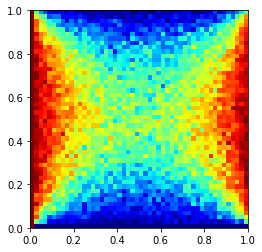

In [8]:
test()